## Importing the required packigase:

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pyarrow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

import pickle

## Reading Data:

### Detainee_Profile:

In [2]:
dtne_prfl = pd.read_parquet('/kaggle/input/detainee-profile/Detainee_Profile.parquet', engine='pyarrow')
dtne_prfl.head()

,Id,DetaineeId,FacilityId,DetaineeTimeInDetention,cbxReligion,PreferredLanguage,DetaineeGender,DetentionDetails,DetaineeDOB,DetentionReason,DetaineeCitizenship,DetaineeArrivalDateTime,TemporaryOffsiteCategory,DetaineeNoLongerInSercoCare,TemporaryOffsiteLocation,GuardianConsent,GuardianConsentNo,GuardianConsentNA,DetaineeMaritalStatus,DetaineeFamilyStatus,DetaineeFamilyinDetention,SelfHarmDetails,SelfHarmCategory,SelfAdminMedApprovalDate,SelfAdminMedCategory,SelfAdminMedDetails,PlacementRisk,MedicalDetails,MedicalCategory,EscortRisk,DietaryCategory,BehaviourDetails,BahaviourCategory,FoodFluidRefusalCommencementDate,FoodFluidRefusalClosureDate,EnhancedMonitoringCommencementDate,DetaineeServiceID,ODS_Update_Datetime
0,9325,590,4,298,Not Stated,Not Stated,Male,From community,1973-07-02 00:00:00,Compliance,SCOTLAND,2016-04-24 00:00:00,None,None,None,0,0,0,Defacto,Single Adult Male,None,None,No Information,None,None,None,High,None,No Information,High,No Information,History,None,None,None,None,1-76QB83G,2017-03-15 16:05:50.000
1,3284875,25943,9,None,Christian (NFD),Fijian,Male,501,1999-04-23 00:00:00,Compliance,FIJI,2022-06-04 14:55:00,None,2022-08-10 10:30:00,None,false,false,false,Single,Single Adult Male,None,None,No Information,None,No,None,High,None,No Information,High,Self Disclosed,Sexual offences,None,None,None,2022-06-04 15:22:44,1-HUD03RQ,2022-08-11 05:03:55.143
2,3152322,21657,11,None,Not Stated,English,Male,501,1983-12-02 00:00:00,Compliance,NEW ZEALAND,2022-02-21 12:35:00,None,2022-05-15 20:07:00,None,False,False,False,None,None,None,None,None,None,None,None,High,None,None,High,None,None,None,None,None,2022-03-22 16:42:00,TEMP315232001,2022-05-16 05:04:05.203
3,9336,592,5,1178,Islam,Somali,Male,None,1994-12-31 00:00:00,IMA,SOMALIA,2016-12-12 16:32:11,None,None,None,0,0,0,None,Single Adult Male,None,History,Previous,None,No,None,High,Not Specified,Current,High,Self Disclosed,History,None,None,None,None,1-113NV5O,2017-06-08 15:05:51.000
4,3273679,25921,1,None,Not Stated,Vietnamese,Male,501,1967-01-19 00:00:00,Compliance,VIETNAM,2022-08-06 13:35:32,None,2022-08-17 06:20:00,None,false,false,false,None,None,None,None,None,None,None,None,Medium,None,None,Medium,None,None,None,None,None,None,1-IOZIMZ7,2022-08-18 05:04:05.767


In [3]:
dtne_prfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27622 entries, 0 to 27621
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Id                                  27622 non-null  int32         
 1   DetaineeId                          27622 non-null  int32         
 2   FacilityId                          27622 non-null  int32         
 3   DetaineeTimeInDetention             4381 non-null   object        
 4   cbxReligion                         27467 non-null  object        
 5   PreferredLanguage                   27468 non-null  object        
 6   DetaineeGender                      27469 non-null  object        
 7   DetentionDetails                    25644 non-null  object        
 8   DetaineeDOB                         27437 non-null  object        
 9   DetentionReason                     27466 non-null  object        
 10  DetaineeCitizenship   

In [4]:
dtne_prfl = dtne_prfl[['DetaineeServiceID','ODS_Update_Datetime','cbxReligion', 'PreferredLanguage' , 'DetaineeGender'  , 'DetentionReason' , 'DetaineeCitizenship' , 'DetaineeMaritalStatus' , 'DetaineeFamilyStatus' , 'SelfHarmDetails' , 'SelfHarmCategory' , 'SelfAdminMedCategory' , 'SelfAdminMedDetails' , 'PlacementRisk' , 'MedicalDetails' , 'MedicalCategory' , 'EscortRisk' ,'BehaviourDetails' ,'DetaineeDOB']]
dtne_prfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27622 entries, 0 to 27621
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DetaineeServiceID      27552 non-null  object        
 1   ODS_Update_Datetime    27622 non-null  datetime64[ns]
 2   cbxReligion            27467 non-null  object        
 3   PreferredLanguage      27468 non-null  object        
 4   DetaineeGender         27469 non-null  object        
 5   DetentionReason        27466 non-null  object        
 6   DetaineeCitizenship    27469 non-null  object        
 7   DetaineeMaritalStatus  18644 non-null  object        
 8   DetaineeFamilyStatus   20398 non-null  object        
 9   SelfHarmDetails        1450 non-null   object        
 10  SelfHarmCategory       10080 non-null  object        
 11  SelfAdminMedCategory   9171 non-null   object        
 12  SelfAdminMedDetails    246 non-null    object        
 13  P

### Incident_Detainees:

In [5]:
inci_dtne = pd.read_parquet('/kaggle/input/detainee-profile/Incident_Detainees.parquet', engine='pyarrow')
inci_dtne.head()

,Id,Seq,IncidentDetaineeParticipationType,IncidentDetaineeParticipantArmed,DetaineeServiceID,ODS_Update_Datetime
0,4952,101,Involved,Yes,1-84NCMFB,2016-10-27 16:06:03
1,4019,101,Involved,No,1-8PPTC3R,2016-10-18 16:06:01
2,6476,101,Involved,No,1-125VTI6,2016-10-31 04:05:42
3,3145,101,Involved,No,1-8HPEZMQ,2016-10-18 16:06:01
4,8136,101,Involved,No,1-8SJ5H7O,2016-10-18 16:06:01


In [6]:
inci_dtne = inci_dtne[['Id','IncidentDetaineeParticipationType','DetaineeServiceID']]
inci_dtne.head()

,Id,IncidentDetaineeParticipationType,DetaineeServiceID
0,4952,Involved,1-84NCMFB
1,4019,Involved,1-8PPTC3R
2,6476,Involved,1-125VTI6
3,3145,Involved,1-8HPEZMQ
4,8136,Involved,1-8SJ5H7O


### Incident_Report:

In [7]:
inci_repo = pd.read_parquet('/kaggle/input/detainee-profile/Incident_Report.parquet', engine='pyarrow')
inci_repo=inci_repo[inci_repo.FacilityId==9]
inci_repo.head()

,Id,FacilityId,IncidentType,IncidentTransportNumber,IncidentSensitive,PortalIRNumber,DateOccured,LocationDetails,IncidentLinkedParticipantDetainee,IncidentDamge,ActualIncidentResolved,IncidentLevel,ODS_Update_Datetime
25,5882,9,Accident / Injury - Minor,None,No,None,2016-10-13 17:20:23,IDC Blaxland,0,No,None,Minor,2016-10-18 16:06:01
241,76626,9,Visitor - other refused access,None,No,1-9E6VS1N,2016-12-14 14:40:16,None,1,No,2016-12-14 14:40:44,Minor,2018-11-01 22:01:35
357,72402,9,Contraband found,None,No,1-9DFNG9G,2016-12-12 15:38:00,IDC Blaxland,1,No,2016-12-12 15:38:39,Minor,2019-07-25 16:03:31
392,76463,9,Use of Force - Planned,1-20062350358,No,1-9E83G40,2016-12-14 12:45:39,Villawood IDC Offsite,1,No,2017-02-06 19:00:00,Minor,2017-02-07 04:05:39
394,73204,9,Failure - security systems,None,No,1-9DLCKZC,2016-12-13 03:10:00,Common Area,0,No,2016-12-13 03:10:00,Major,2017-05-11 16:08:12


In [8]:
inci_repo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41558 entries, 25 to 103493
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Id                                 41558 non-null  int32         
 1   FacilityId                         41558 non-null  int32         
 2   IncidentType                       41511 non-null  object        
 3   IncidentTransportNumber            2889 non-null   object        
 4   IncidentSensitive                  41510 non-null  object        
 5   PortalIRNumber                     41371 non-null  object        
 6   DateOccured                        41499 non-null  object        
 7   LocationDetails                    41197 non-null  object        
 8   IncidentLinkedParticipantDetainee  41558 non-null  object        
 9   IncidentDamge                      41553 non-null  object        
 10  ActualIncidentResolved          

## Joining Data:

In [9]:
data = dtne_prfl.merge(inci_dtne,on='DetaineeServiceID').merge(inci_repo,on='Id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46332 entries, 0 to 46331
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   DetaineeServiceID                  44792 non-null  object        
 1   ODS_Update_Datetime_x              46332 non-null  datetime64[ns]
 2   cbxReligion                        44919 non-null  object        
 3   PreferredLanguage                  44919 non-null  object        
 4   DetaineeGender                     44919 non-null  object        
 5   DetentionReason                    44918 non-null  object        
 6   DetaineeCitizenship                44919 non-null  object        
 7   DetaineeMaritalStatus              37680 non-null  object        
 8   DetaineeFamilyStatus               40095 non-null  object        
 9   SelfHarmDetails                    7492 non-null   object        
 10  SelfHarmCategory                  

## Checking for missing or null values:

In [10]:
missing = data.isna().sum()
px.bar(x=missing.index,y=missing,color=missing,title='Count of Missing Values in each Column')

### As you can notice, there're some columns with a high count of missing values, such as 'SelfHarmDetails','SelfAdminMedDetails','MedicalDetails... etc, let's drop them off.

In [11]:
data.drop(['SelfHarmDetails','SelfAdminMedDetails','MedicalDetails','BehaviourDetails','IncidentTransportNumber'],axis=1,inplace=True)
data.fillna('Unknown',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46332 entries, 0 to 46331
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   DetaineeServiceID                  46332 non-null  object        
 1   ODS_Update_Datetime_x              46332 non-null  datetime64[ns]
 2   cbxReligion                        46332 non-null  object        
 3   PreferredLanguage                  46332 non-null  object        
 4   DetaineeGender                     46332 non-null  object        
 5   DetentionReason                    46332 non-null  object        
 6   DetaineeCitizenship                46332 non-null  object        
 7   DetaineeMaritalStatus              46332 non-null  object        
 8   DetaineeFamilyStatus               46332 non-null  object        
 9   SelfHarmCategory                   46332 non-null  object        
 10  SelfAdminMedCategory              

## Extartcting date data to be predicted later:

In [12]:
data['DateOccured'] = pd.to_datetime(data.DateOccured,errors = 'coerce')
data.drop(['DetaineeDOB'],axis=1,inplace=True)
data['year'] = data.DateOccured.dt.year
data['month'] = data.DateOccured.dt.month
data['dayofmonth'] = data.DateOccured.dt.day
data = data[data.year<=2022]
data.head()

,DetaineeServiceID,ODS_Update_Datetime_x,cbxReligion,PreferredLanguage,DetaineeGender,DetentionReason,DetaineeCitizenship,DetaineeMaritalStatus,DetaineeFamilyStatus,SelfHarmCategory,SelfAdminMedCategory,PlacementRisk,MedicalCategory,EscortRisk,Id,IncidentDetaineeParticipationType,FacilityId,IncidentType,IncidentSensitive,PortalIRNumber,DateOccured,LocationDetails,IncidentLinkedParticipantDetainee,IncidentDamge,ActualIncidentResolved,IncidentLevel,ODS_Update_Datetime_y,year,month,dayofmonth
0,1-HUD03RQ,2022-08-11 05:03:55.143,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,No Information,No,High,No Information,High,3364132,Involved,9,Use of Force - Planned,No,1-IVX4WCV,2022-08-10 02:40:00,Detainee Processing,true,No,2022-08-10 05:30:00,Minor,2022-08-12 05:04:09.467,2022.00,8.00,10.00
1,1-HUD03RQ,2022-08-11 05:03:55.143,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,No Information,No,High,No Information,High,3286743,Involved,9,Use of Force,No,1-IQZD3OA,2022-06-06 10:55:00,Detainee Processing,true,No,2022-06-06 11:34:00,Major,2022-06-07 05:03:38.500,2022.00,6.00,6.00
2,1-HUD03RQ,2022-08-11 05:03:55.143,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,No Information,No,High,No Information,High,3290589,Involved,9,Use of Force,No,1-IR9EJPR,2022-06-09 17:15:00,Meriton Apartments Parramatta APOD,true,No,2022-06-10 21:13:00,Major,2022-06-11 05:03:34.713,2022.00,6.00,9.00
3,1-HUD03RQ,2022-08-11 05:03:55.143,Christian (NFD),Fijian,Male,Compliance,FIJI,Single,Single Adult Male,No Information,No,High,No Information,High,3284856,Involved,9,Use of Force - Planned,No,1-IQVH369,2022-06-04 11:40:00,Alexander Maconochie Correctioinal Centre,True,No,2022-06-04 14:55:00,Minor,2022-06-05 05:03:26.937,2022.00,6.00,4.00
4,1-BXTIKIO,2018-02-28 10:01:20.000,Not Stated,Mandarin,Male,Compliance,"CHINA, PEOPLES REPUBLIC OF",Single,Single Adult Male,No Information,No,High,No Information,High,665254,Involved,9,Visitor - other refused access,No,1-C6A6WNM,2017-10-11 19:22:18,Main Building,1,No,2017-10-11 19:22:48,Minor,2017-10-12 07:11:30.000,2017.00,10.00,11.00


## Checking the number of unique values in each column:

In [13]:
cat_columns = [column for column in data.columns if data[column].dtype == 'object']
for col in cat_columns:
    data[col] = data[col].str.lower().str.strip()
nuniq = data.nunique()
px.bar(x=nuniq.index,y=nuniq,color=nuniq,title='Count of Duplicated Values in each Column',log_y=True)

### As we can notice there're some columns with too many unique values that may effect the accuracy of our predictions, also there are some columns that we no longer need, such as Id & DetaineeServiceID, so let's drop them off:

In [14]:
data.drop(['DetaineeServiceID','ODS_Update_Datetime_x','cbxReligion','FacilityId','PreferredLanguage','DetaineeCitizenship','Id','IncidentType','PortalIRNumber','LocationDetails','ActualIncidentResolved','ODS_Update_Datetime_y'],axis=1,inplace=True)
data.nunique()

DetaineeGender                           4
DetentionReason                          8
DetaineeMaritalStatus                   11
DetaineeFamilyStatus                     6
SelfHarmCategory                         4
SelfAdminMedCategory                     3
PlacementRisk                            5
MedicalCategory                          4
EscortRisk                               5
IncidentDetaineeParticipationType        5
IncidentSensitive                        2
DateOccured                          32918
IncidentLinkedParticipantDetainee        4
IncidentDamge                            3
IncidentLevel                            3
year                                     9
month                                   12
dayofmonth                              31
dtype: int64

In [15]:
nuniq = data.nunique()
px.bar(x=nuniq.index,y=nuniq,color=nuniq,title='Count of Duplicated Values in each Column',log_y=True)

### Now we finished cleaning your data, let's take a quick look at the data:

In [16]:
data.head()

,DetaineeGender,DetentionReason,DetaineeMaritalStatus,DetaineeFamilyStatus,SelfHarmCategory,SelfAdminMedCategory,PlacementRisk,MedicalCategory,EscortRisk,IncidentDetaineeParticipationType,IncidentSensitive,DateOccured,IncidentLinkedParticipantDetainee,IncidentDamge,IncidentLevel,year,month,dayofmonth
0,male,compliance,single,single adult male,no information,no,high,no information,high,involved,no,2022-08-10 02:40:00,true,no,minor,2022.00,8.00,10.00
1,male,compliance,single,single adult male,no information,no,high,no information,high,involved,no,2022-06-06 10:55:00,true,no,major,2022.00,6.00,6.00
2,male,compliance,single,single adult male,no information,no,high,no information,high,involved,no,2022-06-09 17:15:00,true,no,major,2022.00,6.00,9.00
3,male,compliance,single,single adult male,no information,no,high,no information,high,involved,no,2022-06-04 11:40:00,true,no,minor,2022.00,6.00,4.00
4,male,compliance,single,single adult male,no information,no,high,no information,high,involved,no,2017-10-11 19:22:18,1,no,minor,2017.00,10.00,11.00


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 0 to 46331
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   DetaineeGender                     46317 non-null  object        
 1   DetentionReason                    46317 non-null  object        
 2   DetaineeMaritalStatus              46317 non-null  object        
 3   DetaineeFamilyStatus               46317 non-null  object        
 4   SelfHarmCategory                   46317 non-null  object        
 5   SelfAdminMedCategory               46317 non-null  object        
 6   PlacementRisk                      46317 non-null  object        
 7   MedicalCategory                    46317 non-null  object        
 8   EscortRisk                         46317 non-null  object        
 9   IncidentDetaineeParticipationType  46317 non-null  object        
 10  IncidentSensitive                 

## Now let's start Preprocessing our data:

In [18]:
data.set_index('DateOccured',inplace=True)
encos = {}
for col in data.columns:
    encos[col] = LabelEncoder()
    data[col] = encos[col].fit_transform(data[col])
    
data.head()

,DetaineeGender,DetentionReason,DetaineeMaritalStatus,DetaineeFamilyStatus,SelfHarmCategory,SelfAdminMedCategory,PlacementRisk,MedicalCategory,EscortRisk,IncidentDetaineeParticipationType,IncidentSensitive,IncidentLinkedParticipantDetainee,IncidentDamge,IncidentLevel,year,month,dayofmonth
DateOccured,,,,,,,,,,,,,,,,,
2022-08-10 02:40:00,1,1,8,3,1,0,1,1,1,1,0,3,0,2,8,7,9
2022-06-06 10:55:00,1,1,8,3,1,0,1,1,1,1,0,3,0,1,8,5,5
2022-06-09 17:15:00,1,1,8,3,1,0,1,1,1,1,0,3,0,1,8,5,8
2022-06-04 11:40:00,1,1,8,3,1,0,1,1,1,1,0,3,0,2,8,5,3
2017-10-11 19:22:18,1,1,8,3,1,0,1,1,1,1,0,1,0,2,3,9,10


### Ploting a heatmap of the data correlations:

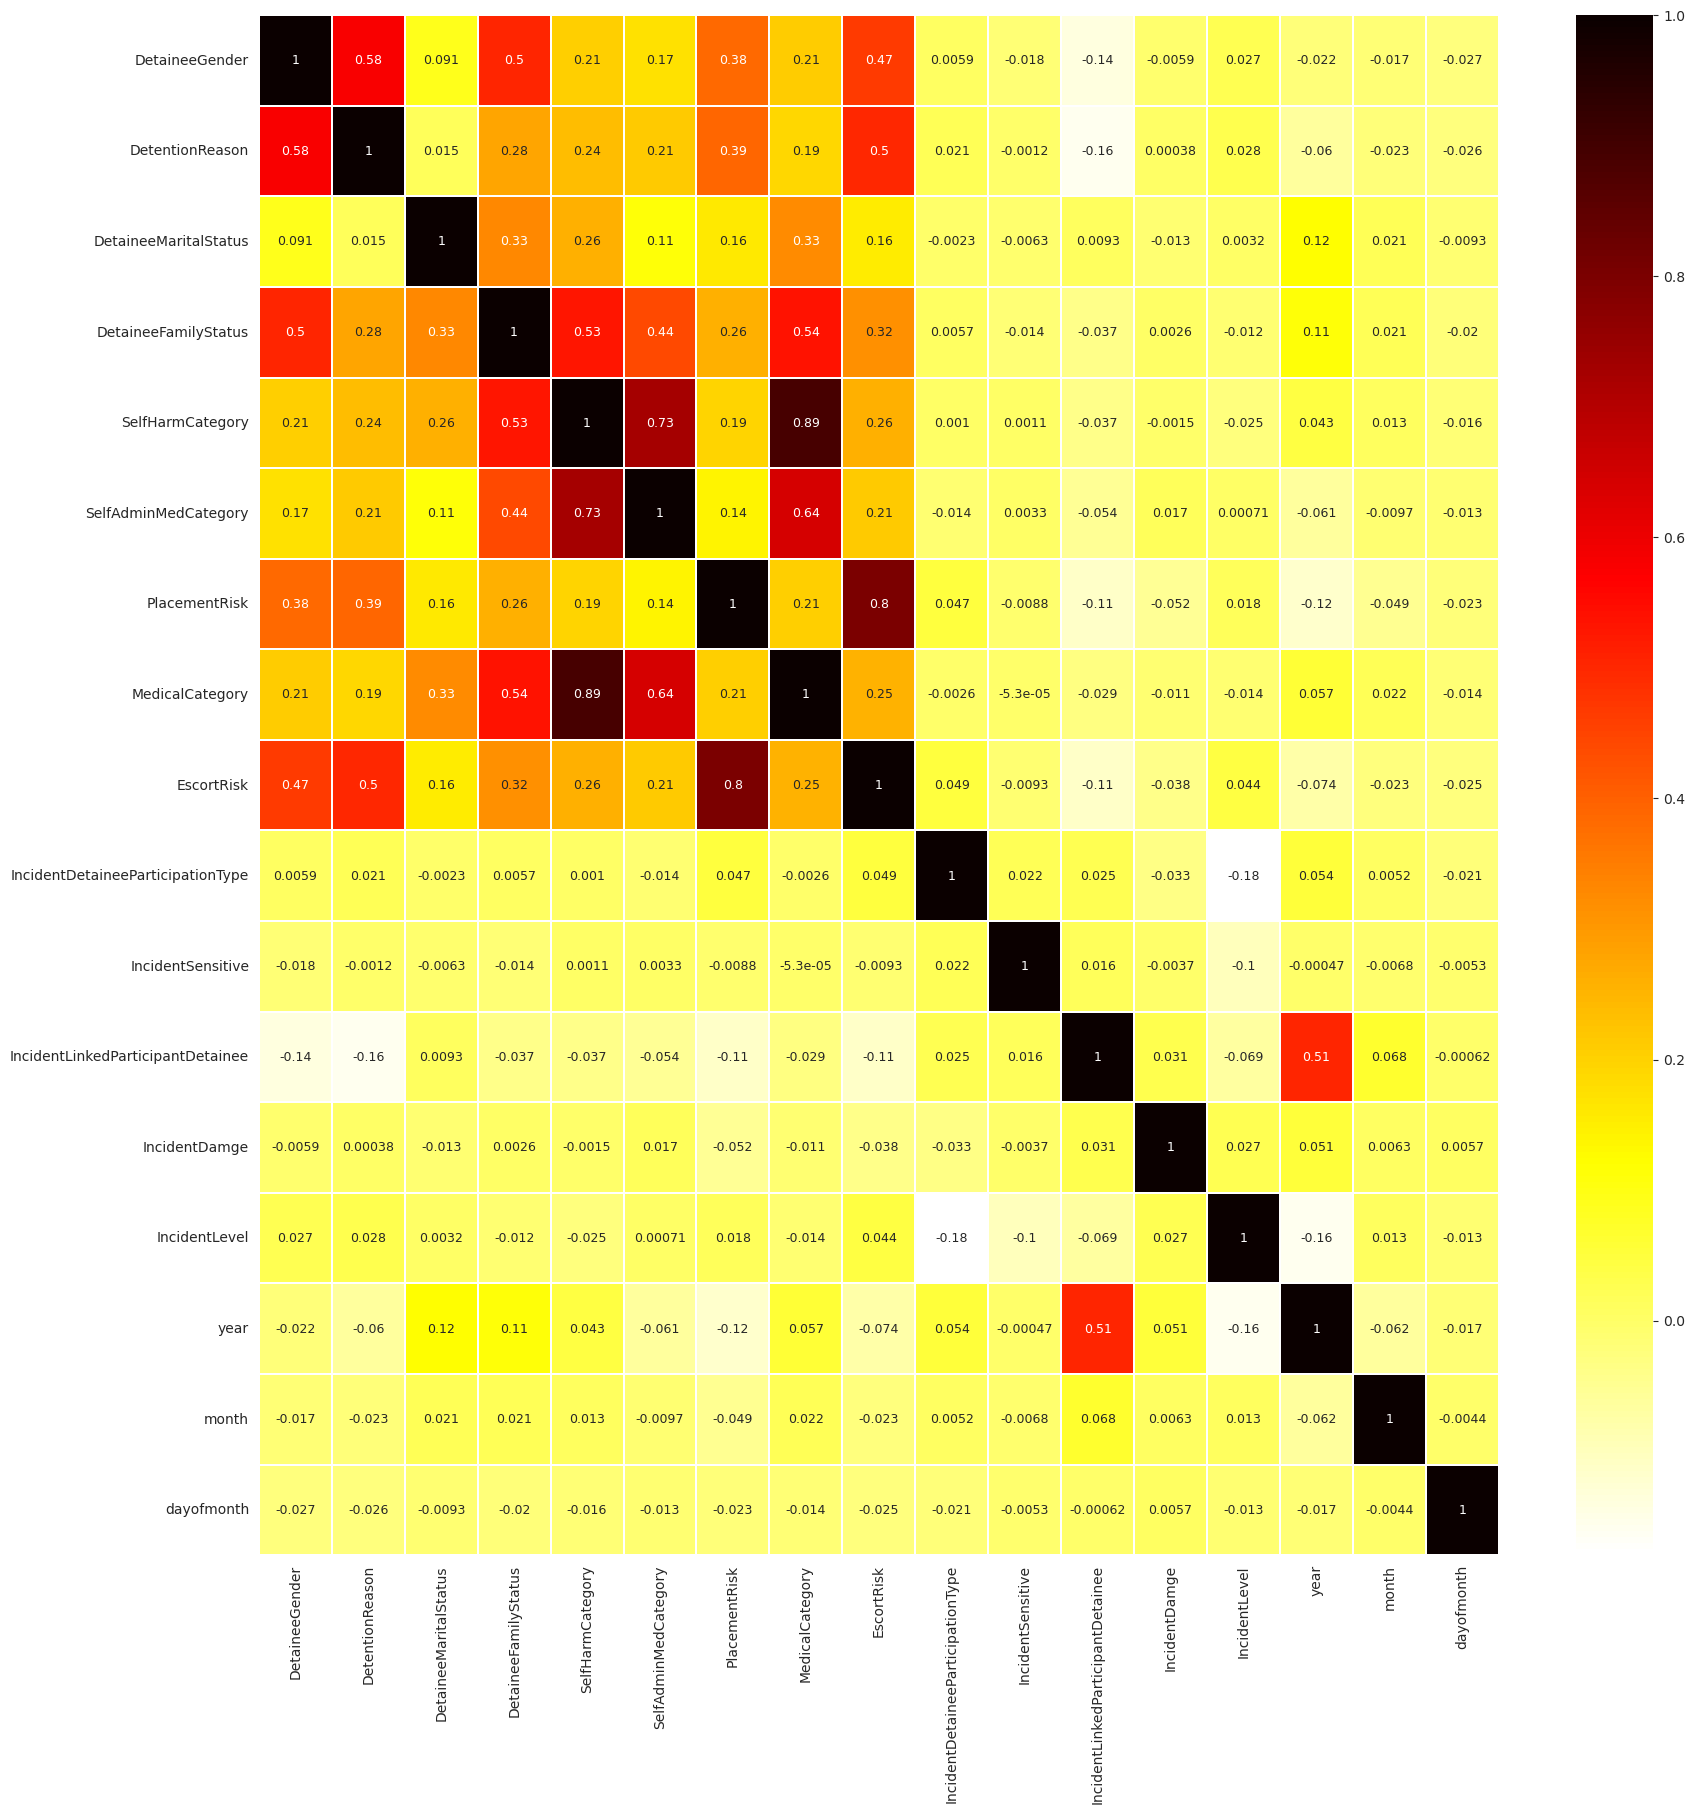

In [19]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap="hot_r", linewidths=0.1, annot_kws={"fontsize":9});

## Creating train and test sets:

In [21]:
X = data.drop(['IncidentLevel','year', 'month', 'dayofmonth'], axis =1)
y = data[['IncidentLevel','year', 'month', 'dayofmonth']]

# Scaling the data. 
data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(X.values)

scaled_data= pd.DataFrame(scaled_data, index=X.index, columns=X.columns)

x_train, x_test, y_train, y_test = train_test_split(scaled_data,y, test_size=0.2, random_state=42)

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37053 entries, 2020-10-13 12:20:00 to 2018-03-28 05:45:00
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DetaineeGender                     37053 non-null  float64
 1   DetentionReason                    37053 non-null  float64
 2   DetaineeMaritalStatus              37053 non-null  float64
 3   DetaineeFamilyStatus               37053 non-null  float64
 4   SelfHarmCategory                   37053 non-null  float64
 5   SelfAdminMedCategory               37053 non-null  float64
 6   PlacementRisk                      37053 non-null  float64
 7   MedicalCategory                    37053 non-null  float64
 8   EscortRisk                         37053 non-null  float64
 9   IncidentDetaineeParticipationType  37053 non-null  float64
 10  IncidentSensitive                  37053 non-null  float64
 11  IncidentLinkedParti

In [23]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37053 entries, 2020-10-13 12:20:00 to 2018-03-28 05:45:00
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   IncidentLevel  37053 non-null  int64
 1   year           37053 non-null  int64
 2   month          37053 non-null  int64
 3   dayofmonth     37053 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [24]:
ltest = y_test.iloc[:,0]
ytest = y_test.iloc[:,1]
mtest = y_test.iloc[:,2]
dtest = y_test.iloc[:,3]
ltrain = y_train.iloc[:,0]
ytrain = y_train.iloc[:,1]
mtrain = y_train.iloc[:,2]
dtrain = y_train.iloc[:,3]

## IncidentLevel prediction:

### Model fitting:

In [25]:
levelxgb = XGBClassifier().fit(x_train,ltrain)

### Predictions evaluation:

accuracy score: 0.7699697754749568


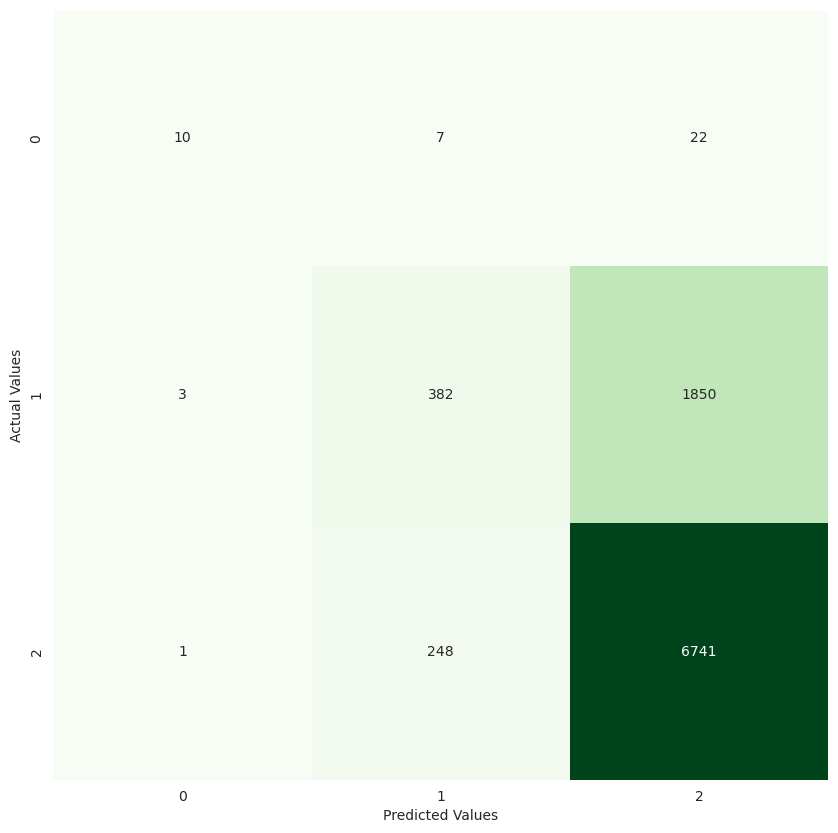

In [26]:
def cf(model, y_valid_, X_valid = x_test):
    
    y_pred = model.predict(X_valid)
    confusionMatrix = confusion_matrix(y_valid_, y_pred)
    print('accuracy score:',accuracy_score(y_valid_, y_pred))
    plt.figure(figsize=(10, 10))
    sns.heatmap(confusionMatrix, annot=True, fmt='g', cbar=False, cmap='Greens')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
cf(levelxgb,ltest)

### Now we have predictions with 76.9% accuracy score, let's see if we can improve that...
## Feature Engineering:

In [27]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(levelxgb, random_state=0).fit(x_test, ltest)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0412 ± 0.0048,IncidentDetaineeParticipationType
0.0133 ± 0.0027,SelfAdminMedCategory
0.0072 ± 0.0013,DetentionReason
0.0059 ± 0.0015,DetaineeFamilyStatus
0.0050 ± 0.0012,SelfHarmCategory
0.0048 ± 0.0017,DetaineeMaritalStatus
0.0044 ± 0.0019,MedicalCategory
0.0034 ± 0.0014,IncidentLinkedParticipantDetainee
0.0028 ± 0.0016,PlacementRisk
0.0023 ± 0.0010,EscortRisk


### From the table above we can find that IncidentDamge column barely has an impact on the predictions, let's drop it off.

accuracy score: 0.7710492227979274


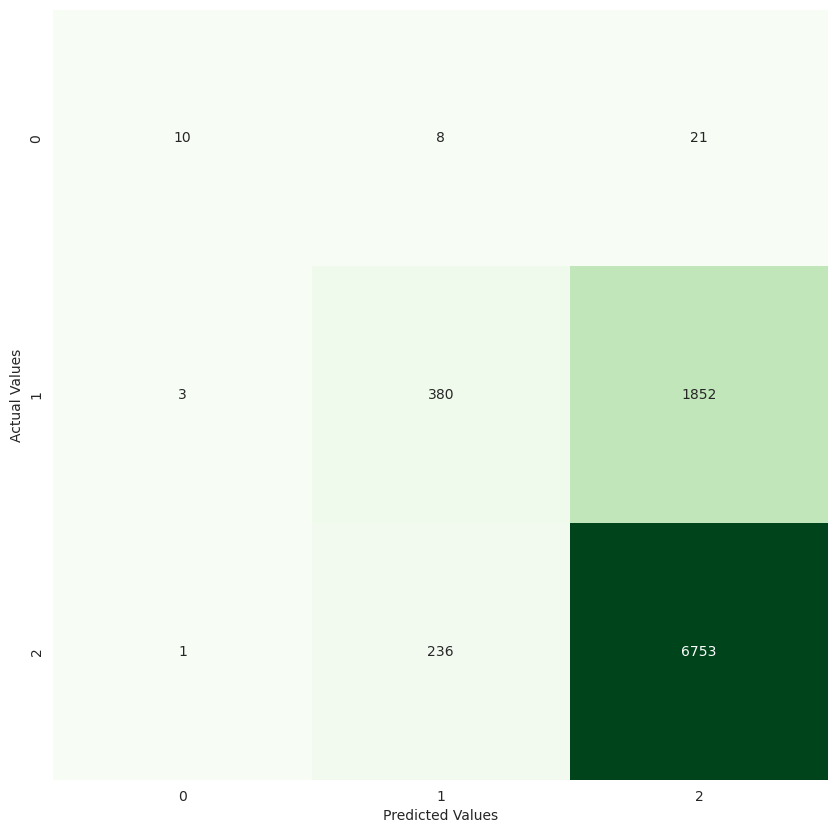

In [28]:
cols = x_test.drop(['IncidentDamge'],axis=1).columns

def check_columns(cols,ytr,yts,model=XGBClassifier()):
    xgb = model.fit(x_train[cols],ytr)
    cf(xgb,yts,x_test[cols])
    
check_columns(cols,ltrain,ltest)

### The predictions have become a little bit better with accuracy near to 77.1%

In [29]:
levelxgb = XGBClassifier()
levelxgb.fit(x_train[cols],ltrain)
levelpred = encos['IncidentLevel'].inverse_transform(levelxgb.predict(x_test[cols]))
levelpred

array(['minor', 'major', 'minor', ..., 'minor', 'minor', 'minor'],
      dtype=object)

## Year Prediction:

In [30]:
yearxgb = XGBClassifier().fit(x_train,ytrain)

accuracy score: 0.45703799654576854


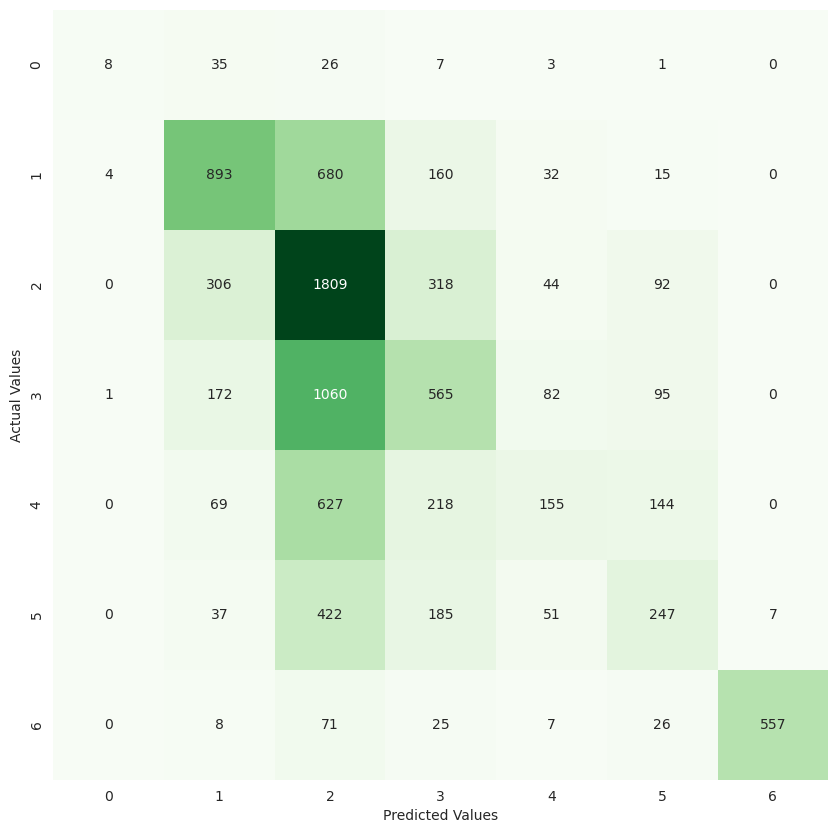

In [31]:
cf(yearxgb,ytest)

In [32]:
perm = PermutationImportance(yearxgb, random_state=0).fit(x_test, ytest)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0842 ± 0.0023,IncidentLinkedParticipantDetainee
0.0758 ± 0.0059,SelfAdminMedCategory
0.0675 ± 0.0067,SelfHarmCategory
0.0657 ± 0.0024,DetaineeMaritalStatus
0.0540 ± 0.0035,DetaineeFamilyStatus
0.0476 ± 0.0031,MedicalCategory
0.0456 ± 0.0030,PlacementRisk
0.0290 ± 0.0047,EscortRisk
0.0256 ± 0.0014,DetentionReason
0.0250 ± 0.0044,IncidentDetaineeParticipationType


accuracy score: 0.45952072538860106


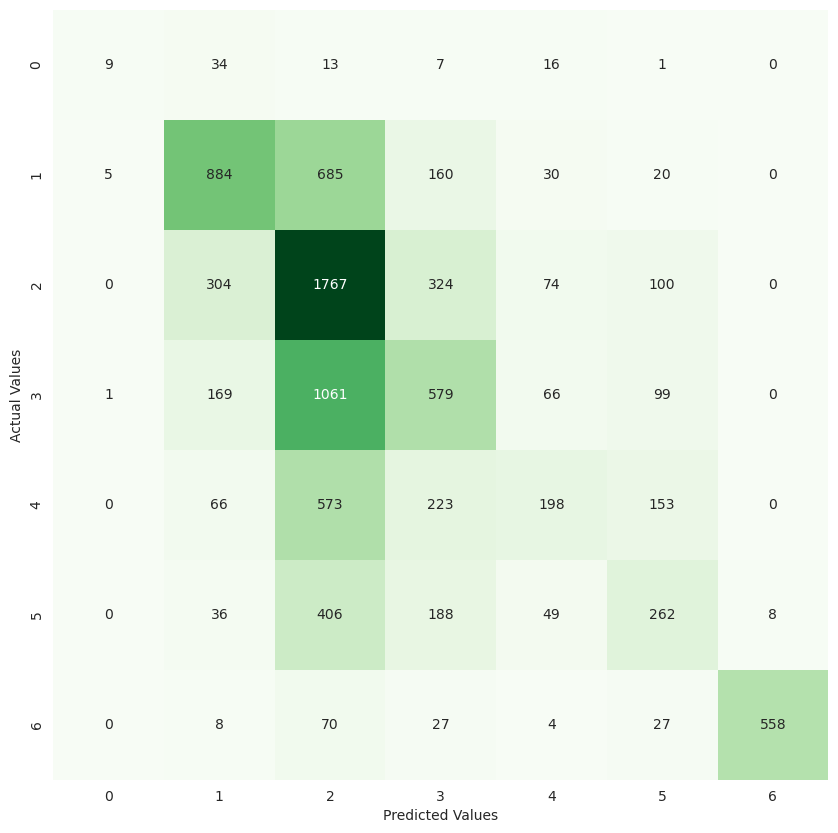

In [33]:
cols = x_test.drop(['IncidentDamge','IncidentSensitive'],axis=1).columns

check_columns(cols,ytrain,ytest)

In [34]:
yearxgb = XGBClassifier()
yearxgb.fit(x_train[cols],ytrain)
yearpred = encos['year'].inverse_transform(yearxgb.predict(x_test[cols]))
yearpred

array([2019., 2021., 2017., ..., 2021., 2019., 2018.])

## Month Prediction:

accuracy score: 0.15695164075993093


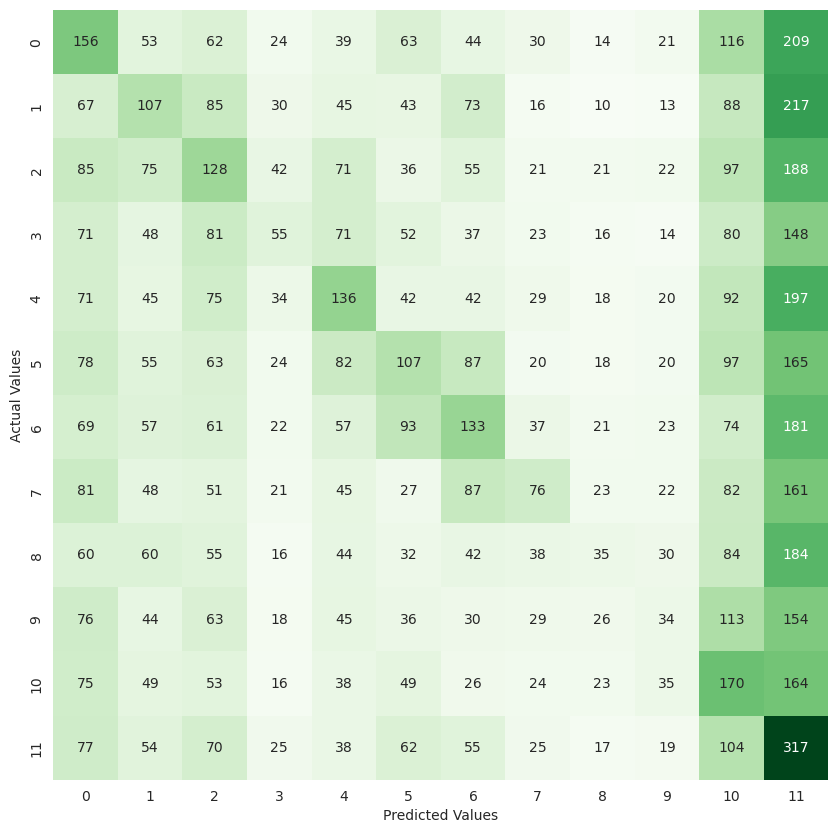

In [35]:
monthxgb = XGBClassifier().fit(x_train,mtrain)
cf(monthxgb,mtest)

In [36]:
perm = PermutationImportance(monthxgb, random_state=0).fit(x_test, mtest)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0315 ± 0.0071,DetaineeMaritalStatus
0.0268 ± 0.0057,PlacementRisk
0.0251 ± 0.0036,SelfHarmCategory
0.0239 ± 0.0056,MedicalCategory
0.0201 ± 0.0024,SelfAdminMedCategory
0.0198 ± 0.0026,IncidentDetaineeParticipationType
0.0187 ± 0.0032,DetaineeFamilyStatus
0.0160 ± 0.0028,IncidentLinkedParticipantDetainee
0.0131 ± 0.0034,EscortRisk
0.0119 ± 0.0016,DetaineeGender


accuracy score: 0.158786701208981


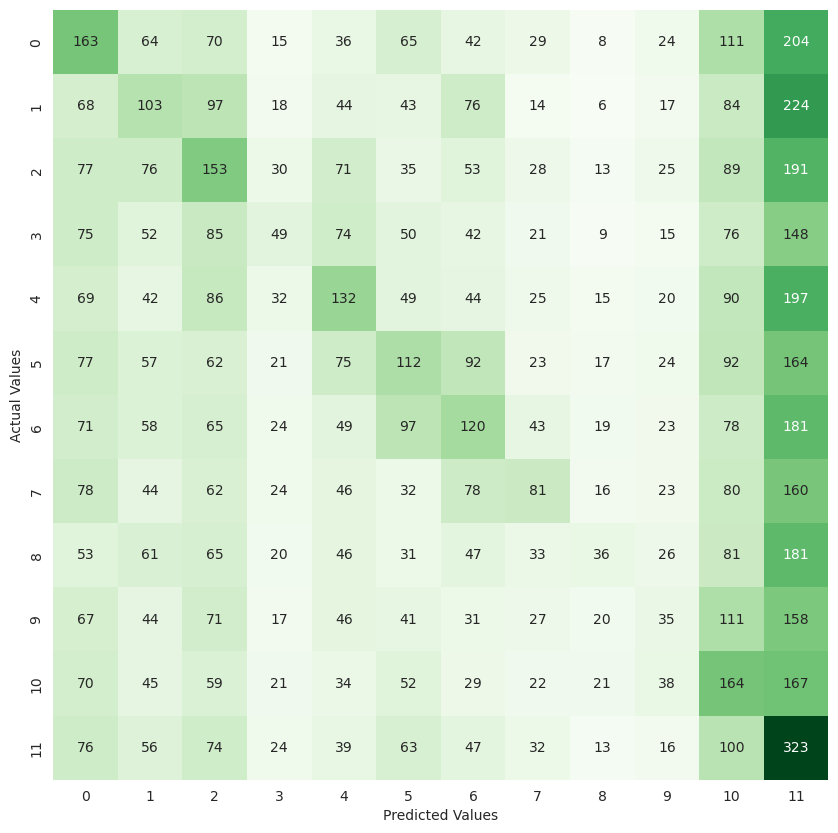

In [37]:
cols = x_test.drop(['IncidentDamge','IncidentSensitive'],axis=1).columns

check_columns(cols,mtrain,mtest)

In [38]:
monthxgb = XGBClassifier()
monthxgb.fit(x_train[cols],mtrain)
monthpred = encos['month'].inverse_transform(monthxgb.predict(x_test[cols]))
monthpred

array([12.,  1., 12., ..., 11.,  7., 11.])

## Day Prediction:

accuracy score: 0.06196027633851468


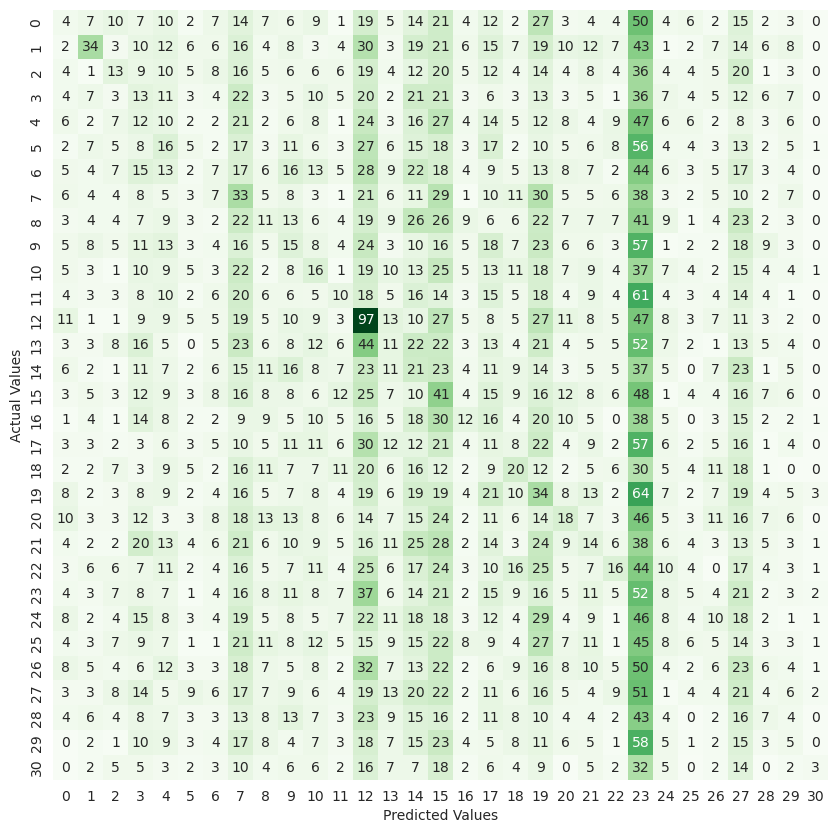

In [39]:
dayxgb = XGBClassifier().fit(x_train,dtrain)
cf(dayxgb,dtest)

In [40]:
perm = PermutationImportance(dayxgb, random_state=0).fit(x_test, dtest)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0131 ± 0.0017,IncidentLinkedParticipantDetainee
0.0103 ± 0.0023,PlacementRisk
0.0099 ± 0.0023,DetaineeMaritalStatus
0.0099 ± 0.0019,IncidentDetaineeParticipationType
0.0068 ± 0.0025,SelfHarmCategory
0.0054 ± 0.0039,MedicalCategory
0.0047 ± 0.0016,DetaineeFamilyStatus
0.0035 ± 0.0019,SelfAdminMedCategory
0.0034 ± 0.0014,DetaineeGender
0.0031 ± 0.0020,DetentionReason


accuracy score: 0.062068221070811745


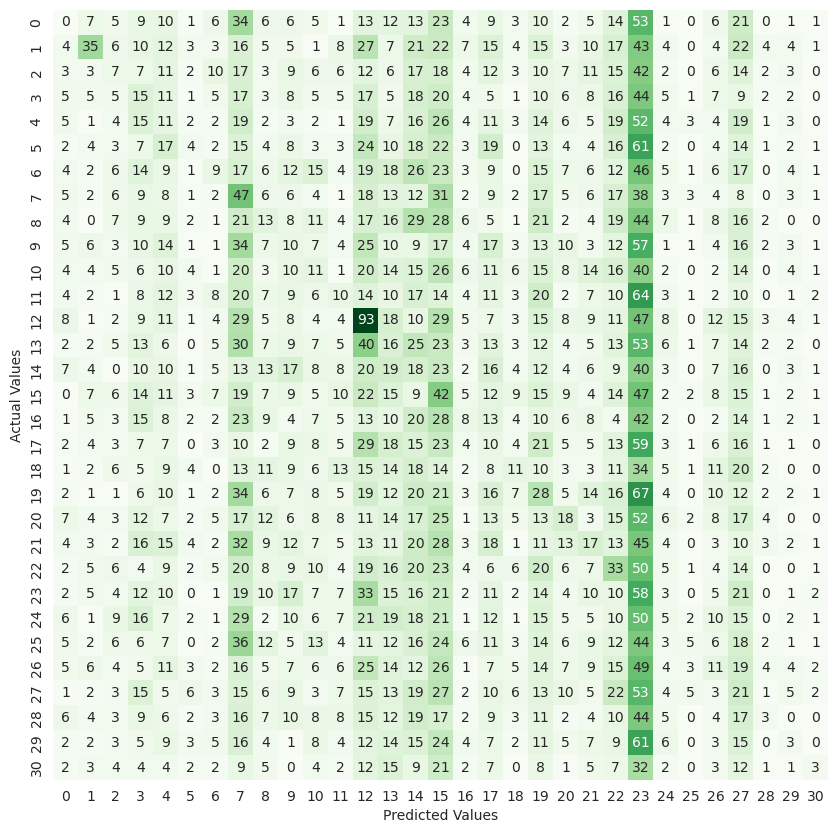

In [41]:
cols = x_test.drop(['IncidentDamge','IncidentSensitive','EscortRisk'],axis=1).columns

check_columns(cols,dtrain,dtest)

In [42]:
daypred = XGBClassifier()
dayxgb.fit(x_train[cols],dtrain)
daypred = encos['dayofmonth'].inverse_transform(dayxgb.predict(x_test[cols]))
daypred

array([15., 16., 24., ..., 14., 27.,  8.])

## Resulting:

In [43]:
y_test.head()

,IncidentLevel,year,month,dayofmonth
DateOccured,,,,
2019-02-20 14:35:00,2,5,1,19
2019-11-13 16:53:37,1,5,10,12
2018-02-07 07:10:02,2,4,1,6
2017-12-01 07:55:00,2,3,11,0
2019-03-18 07:20:36,2,5,2,17


In [44]:
res = pd.DataFrame()
res.index = y_test.index
for col,pred in zip(y_test.columns,[levelpred,yearpred,monthpred,daypred]):
    
    res[col] = encos[col].inverse_transform(y_test[col])
    res['Predicted ' + col] = pred

res.head()

,IncidentLevel,Predicted IncidentLevel,year,Predicted year,month,Predicted month,dayofmonth,Predicted dayofmonth
DateOccured,,,,,,,,
2019-02-20 14:35:00,minor,minor,2019.00,2019.00,2.00,12.00,20.00,15.00
2019-11-13 16:53:37,major,major,2019.00,2021.00,11.00,1.00,13.00,16.00
2018-02-07 07:10:02,minor,minor,2018.00,2017.00,2.00,12.00,7.00,24.00
2017-12-01 07:55:00,minor,minor,2017.00,2017.00,12.00,11.00,1.00,9.00
2019-03-18 07:20:36,minor,minor,2019.00,2018.00,3.00,12.00,18.00,24.00


In [45]:
res.reset_index().to_excel('XGBoost Incident Level&Date Predictions.xlsx',index=False)